### import packages

In [1]:
import numpy as np
from mod_my_utils.read_write_data import *
from mod_macd_utils.macd import get_macd_signal_line
from mod_macd_utils.macd import signal_generate_long_short


### Read data

In [3]:
# parameters for getting stock 
data_source = "yahoo"
# MM/DD/YYYY
start_date = "1/1/2010"
end_date = "1/1/2015"
stock_name = 'HDFC' + '.NS'
datasource = data_source
symbol

'HDFC.NS'

### Read data from Yahoo

In [4]:
data = get_price_yahoo(symbol, data_source, start_date, end_date)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,547.400024,533.170044,538.960022,534.869995,1176220.0,447.944489
2010-01-05,546.000000,533.220032,541.599976,536.690002,1650740.0,449.468811
2010-01-06,540.000000,532.250000,540.000000,539.270020,2017460.0,451.629517
2010-01-07,539.000000,525.109985,535.440002,529.229980,3453515.0,443.221222
2010-01-08,533.460022,518.070007,530.000000,520.010010,11425060.0,435.499573


### Get Relevant data for model development

In [5]:
data = data[["Adj Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2010-01-04,447.944489
2010-01-05,449.468811
2010-01-06,451.629517
2010-01-07,443.221222
2010-01-08,435.499573


### Get Parameter

In [7]:
short_window = 20
long_window = 50
signal_window = 12


### MACD Signals

In [8]:
macd_signal_line = get_macd_signal_line(data, short_window, long_window, signal_window)
signals = signal_generate_long_short(macd_signal_line, long_window)

<AxesSubplot:xlabel='Date'>

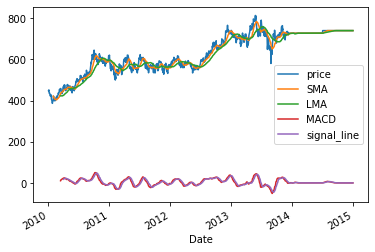

In [9]:
macd_signal_line.plot()

<AxesSubplot:xlabel='Date'>

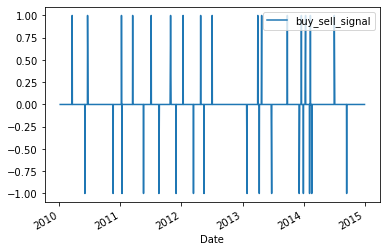

In [11]:
signals.plot()

In [24]:
signals.head()

,buy_sell_signal
Date,
2010-01-04,NaN
2010-01-05,0.0
2010-01-06,0.0
2010-01-07,0.0
2010-01-08,0.0


### Plot

In [16]:
import matplotlib.pyplot as plt

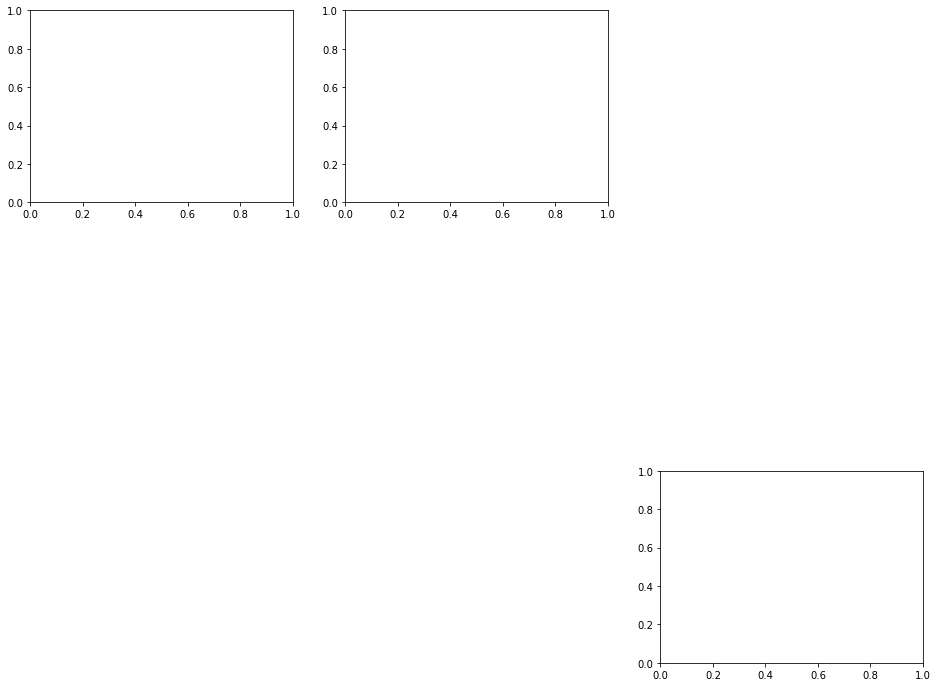

In [21]:
graph = plt.figure(figsize=(16,12))
graph.add_subplot(331)
graph.add_subplot(332)
graph.add_subplot(339)
plt.show()

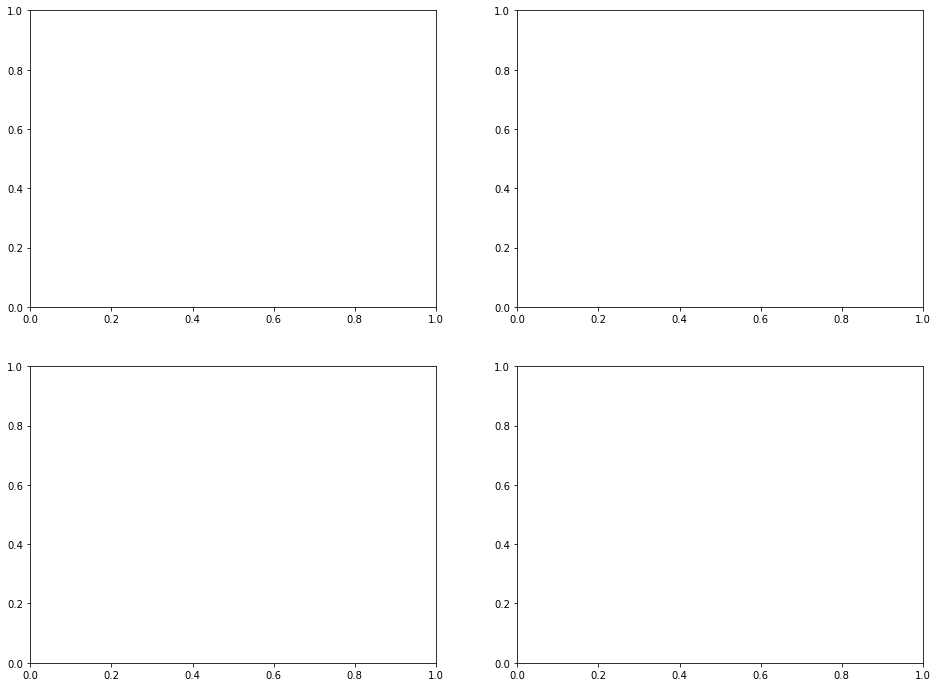

In [22]:
# fig = plt.figure()
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(221)   #top left
fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right 
plt.show()

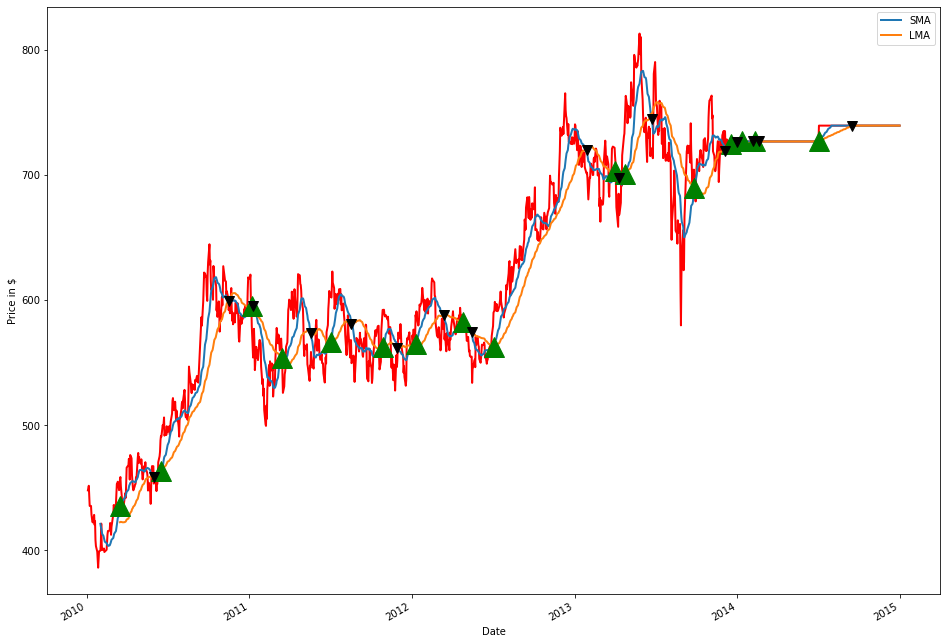

In [28]:
# putting all above together
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(111, ylabel='Price in $')
macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 2.)
macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
ax1.plot(macd_signal_line.loc[signals.buy_sell_signal ==1.0].index, macd_signal_line.SMA[signals.buy_sell_signal == 1.0], '^', markersize=20, color = 'g')
ax1.plot(macd_signal_line.loc[signals.buy_sell_signal == -1.0].index, macd_signal_line.SMA[signals.buy_sell_signal == -1.0], 'v', markersize=10, color='k')
plt.show()

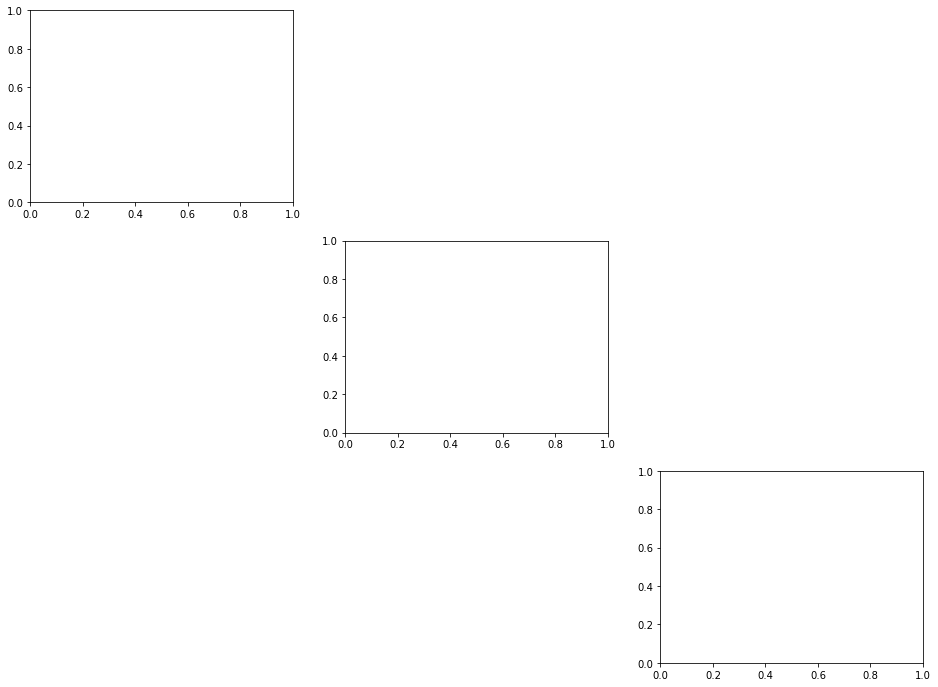

In [13]:
graph = plt.figure(figsize=(16,12))
graph.add_subplot(331)
graph.add_subplot(335)
graph.add_subplot(339)
plt.show()